In [1]:
# -*- coding:UTF-8 -*- ＃
#导入模块
import sys
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import math

from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from ipywidgets import interactive,FloatSlider

sys.path.append(r"C:\Users\zhang\Desktop\exeserise")
import mymodule as MYD

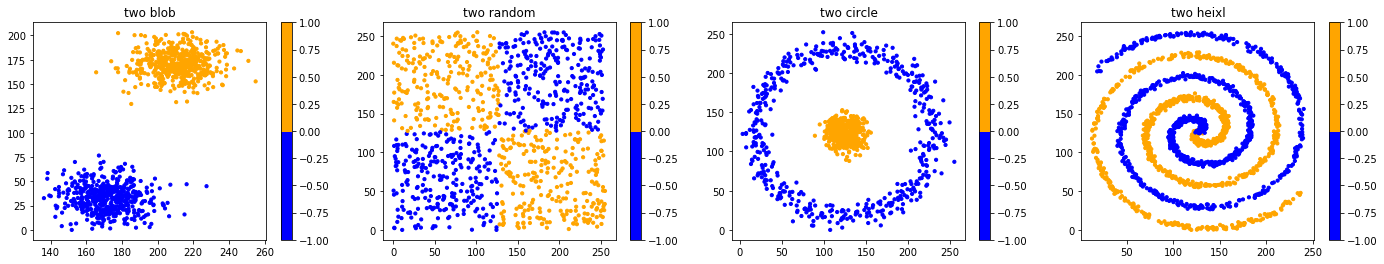

In [2]:
n_samples=1000
XB,yb=MYD.makeblods(n_samples)
XR,yr=MYD.makerandoms(n_samples)
XC,yc=MYD.makecircles(n_samples)
XH,yh=MYD.makeHelixs(n_samples)
XAS = [XB, XR, XC,XH]
YAS=[yb,yr,yc,yh]

XBzoom=MYD.ZoomIn(XB,1); XRzoom=MYD.ZoomIn(XR,1); XCzoom=MYD.ZoomIn(XC,1); XHzoom=MYD.ZoomIn(XH,1); 
XASzoom=[XBzoom,XRzoom,XCzoom,XHzoom];

cor = ListedColormap(['Blue', 'Orange'])
titlename=['two blob','two random','two circle','two heixl']
cmap=[cor,cor,cor,cor]
MYD.DrawManyChart(XAS,YAS,cmap,24,4,titlename,10,1,4)


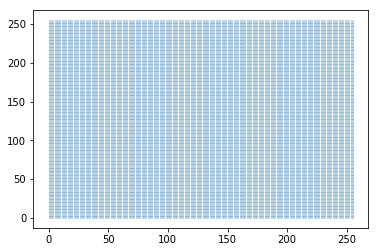

In [3]:
Xzip,points=MYD.makeGrids()
plt.figure()
plt.scatter(points[:,0],points[:,1],s=0.009)
plt.show()

np.random.shuffle(points)

[[-0.35085514 -0.45539746 -1.         -1.          1.          0.44189485
   1.          0.36435775]]


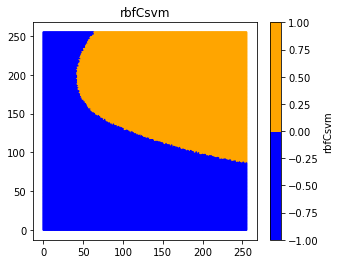

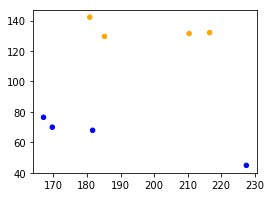

In [4]:
cor = ListedColormap(['Blue', 'Orange'])
lableSVM=[]; scoreSVM=[];
Kernelfunction=['linear','poly','rbf','sigmoid','precomputed'];

L=len(points); a=1
number_of_points = int(a*L)
p = points[0:number_of_points]

DI=0
modelSVM=SVC(C=1, kernel=Kernelfunction[2],gamma=0.0001)
tempmodule=modelSVM.fit(XAS[DI],YAS[DI])
lableSVM.append(tempmodule.predict(p))
scoreSVM.append(tempmodule.score(XAS[DI],YAS[DI]))
allSV=tempmodule.support_vectors_
intercept=tempmodule.intercept_
axishu=tempmodule.dual_coef_
        
print(axishu)
MYD.DrawChartColorBar(p,lableSVM,cor,5,4,'rbfCsvm','rbfCsvm')

labeiSVC=tempmodule.predict(allSV)

plt.figure(figsize=(4,3))
plt.scatter(allSV[:,0],allSV[:,1],c=labeiSVC,s=20,cmap=cor)
plt.show()


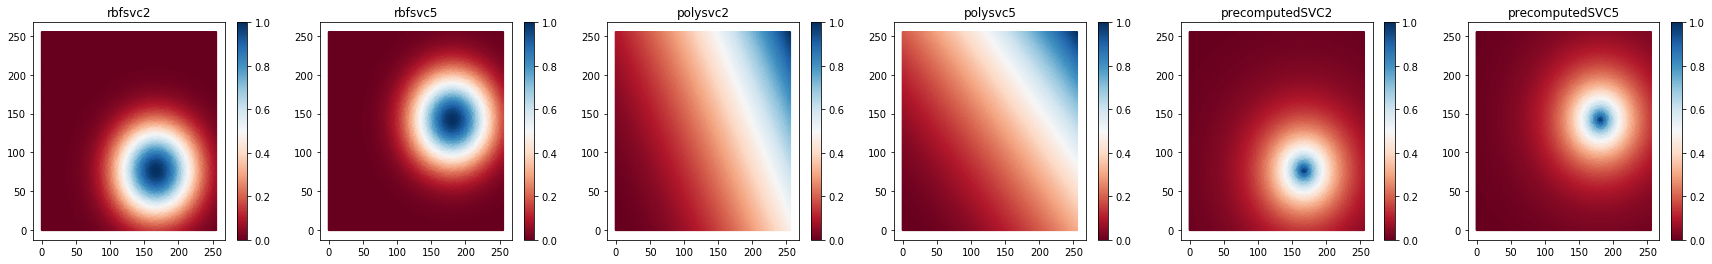

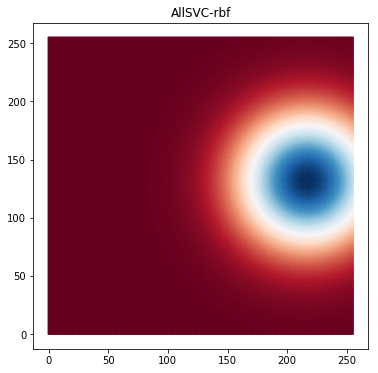

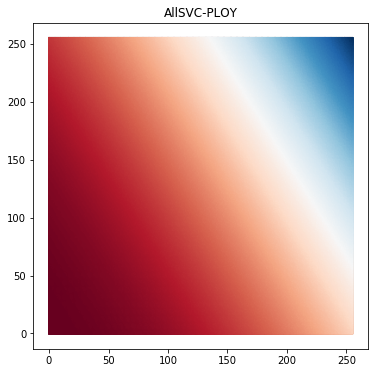

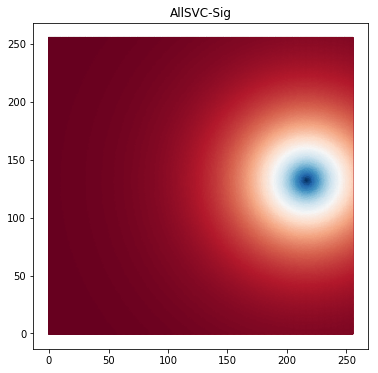

In [5]:
SVMallabelrbf=[];
for l in range(0,len(allSV)):
    SVMallabelrbf.append(MYD.rbfK(p,allSV[l],40));

SVMallabelploy=[];
for M in range(0,len(allSV)):
    SVMallabelploy.append(MYD.polyD(p,allSV[M],2));

SVMallabelSigmid=[];
for N in range(0,len(allSV)):
    SVMallabelSigmid.append(MYD.precomputedK(p,allSV[N],40));

corSVM=plt.cm.get_cmap('RdBu')
PP=[p,p,p,p,p,p];  alllaebl=[SVMallabelrbf[2],SVMallabelrbf[5],SVMallabelploy[2],SVMallabelploy[5],SVMallabelSigmid[2],SVMallabelSigmid[5]];
titlename=['rbfsvc2','rbfsvc5','polysvc2','polysvc5','precomputedSVC2','precomputedSVC5']
cmap=[corSVM,corSVM,corSVM,corSVM,corSVM,corSVM]
MYD.DrawManyChart(PP,alllaebl,cmap,30,4,titlename,2,1,6)

plt.figure(figsize=(6,6))
labelHE=[];
for j in range(0,len(SVMallabelrbf[0])):
    for i in range(0,len(SVMallabelrbf)):
        maxIndex=0
        if(SVMallabelrbf[i][j]>=maxIndex):
            maxIndex=SVMallabelrbf[i][j]
    labelHE.append(maxIndex);
plt.scatter(p[:,0],p[:,1],c=labelHE,s=1,cmap=corSVM);
plt.title("AllSVC-rbf")
plt.show();

plt.figure(figsize=(6,6))
for i in range(0,len(SVMallabelploy)):
    plt.scatter(p[:,0],p[:,1],c=SVMallabelploy[i],s=1,cmap=corSVM);
plt.title("AllSVC-PLOY")
plt.show();

plt.figure(figsize=(6,6))
for i in range(0,len(SVMallabelSigmid)):
    plt.scatter(p[:,0],p[:,1],c=SVMallabelSigmid[i],s=1,cmap=corSVM);
plt.title("AllSVC-Sig")
plt.show();


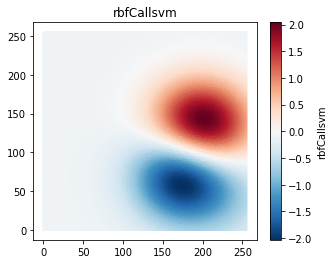

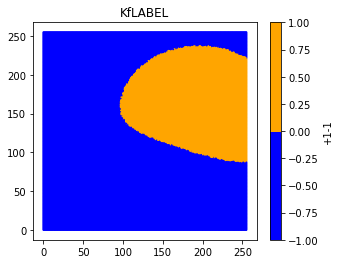

In [6]:
axishu=np.array(axishu[0])
sumYKA=MYD.Multiplyonedata(SVMallabelrbf[0],axishu[0])

for fi in range(1,len(allSV)):
    tempYK=MYD.Multiplyonedata(SVMallabelrbf[fi],axishu[fi])
    sumYKA=MYD.addarray(sumYKA,tempYK)

sumYKA=MYD.MatrixAddoneData(sumYKA,intercept)
sumYKA=np.array(sumYKA);

finalLabel=[];
for LI in range(0,len(sumYKA)):
    if(sumYKA[LI]>0):
        finalLabel.append(1)
    else:
        finalLabel.append(-1)

corfinal=plt.cm.get_cmap('RdBu_r')
MYD.DrawChartColorBar(p,sumYKA,corfinal,5,4,'rbfCallsvm','rbfCallsvm')
MYD.DrawChartColorBar(p,finalLabel,cor,5,4,'KfLABEL','+1-1')


In [7]:
axishu=np.array(axishu[0])
sumYKA=MYD.Multiplyonedata(SVMallabelploy[0],axishu[0])

for fi in range(1,len(allSV)):
    tempYK=MYD.Multiplyonedata(SVMallabelploy[fi],axishu[fi])
    sumYKA=MYD.addarray(sumYKA,tempYK)

sumYKA=MYD.MatrixAddoneData(sumYKA,intercept)
sumYKA=np.array(sumYKA);

finalLabel=[];
for LI in range(0,len(sumYKA)):
    if(sumYKA[LI]>0):
        finalLabel.append(1)
    else:
        finalLabel.append(-1)

corfinal=plt.cm.get_cmap('RdBu')
MYD.DrawChartColorBar(p,sumYKA,corfinal,5,4,'rbfCallsvm','rbfCallsvm')
MYD.DrawChartColorBar(p,finalLabel,cor,5,4,'KfLABEL','+1-1')

IndexError: too many indices for array